In [1]:
from oshaberi_model2 import OshaberiAutoEncoder
from mel2wave_data import ToData
import config
import torch
import pytorch_lightning as pl
from DatasetLib import Dataset_onMemory
import matplotlib.pyplot as plt
from torch.utils import data as DataUtil

In [2]:
data_set = Dataset_onMemory(ToData.file_name,ToData.data_key,using_length=-1,log=True)

loaded: data, shape: (20, 128, 64)


In [3]:
model = OshaberiAutoEncoder('params/WaveDecoder2_2021-07-18_07-13-48.params')
batch_size = 16
EPOCHS = 1000
data_loader = DataUtil.DataLoader(data_set,batch_size,shuffle=True,num_workers=0,pin_memory=False)

In [4]:
trainer = pl.Trainer(gpus=1,num_nodes=1,precision=16,max_epochs=EPOCHS)
trainer.fit(model,data_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type        | Params
---------------------------------------------
0 | criterion    | MSELoss     | 0     
1 | mel_scaler   | MelScale    | 0     
2 | controller   | Controller  | 655 K 
3 | wave_decoder | WaveDecoder | 1.5 M 
---------------------------------------------
655 K     Trainable params
1.5 M     Non-trainable params
2.1 M     Total params
8.461     Total estimated model params size (MB)
C:\Users\22shi\anaconda3\envs\JARVIS\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 536:   0%|          | 0/2 [00:00<?, ?it/s, loss=0.12, v_num=35]

C:\Users\22shi\anaconda3\envs\JARVIS\lib\site-packages\pytorch_lightning\trainer\trainer.py:897: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn('Detected KeyboardInterrupt, attempting graceful shutdown...')


In [5]:
from datetime import datetime
now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
name = f'params/OshaberiAutoEncoder_{now}.params'
torch.save(model.state_dict(),name)
print('saved')

saved


In [ ]:
#model.load_state_dict(torch.load('params/OshaberiAutoEncoder_2021-07-16_09-18-09.params'))

<All keys matched successfully>

In [8]:
viewlen = 10
with torch.no_grad():
    model.eval()
    model.cuda()
    model.float()
    data = data_set.data[0][:viewlen].cuda().float()
    melout = model(data).cpu().float()
    waveout = model.toWave(data).cpu().float().numpy()
    melans = data.cpu().float()

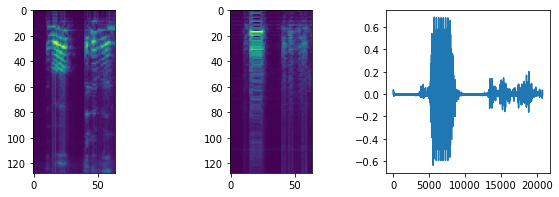

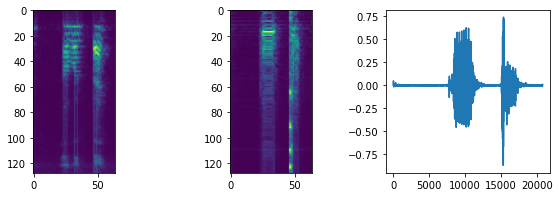

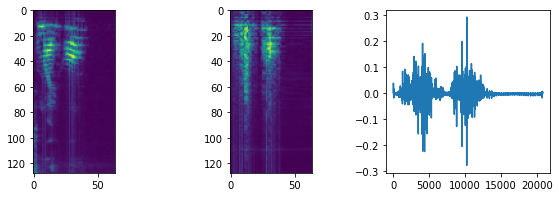

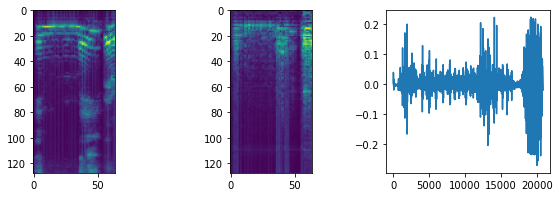

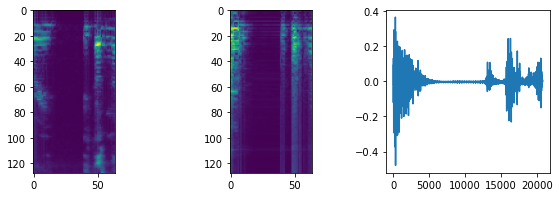

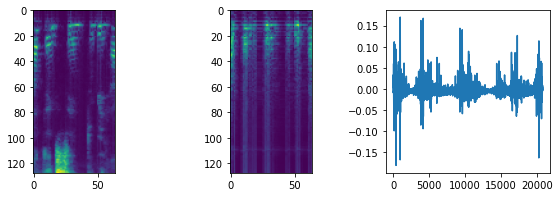

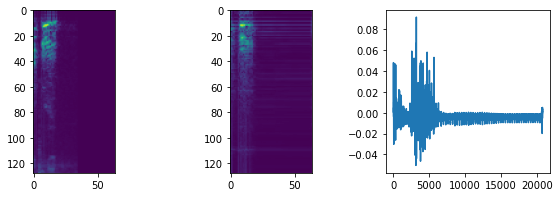

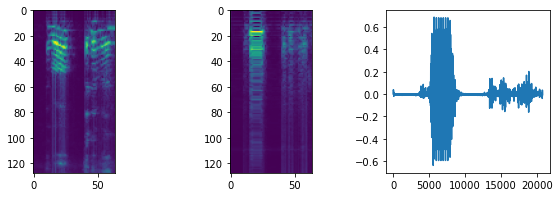

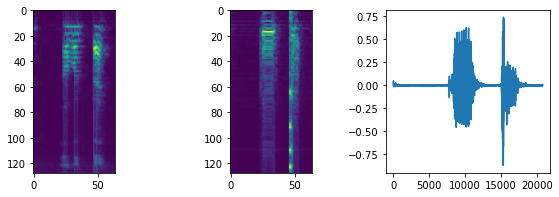

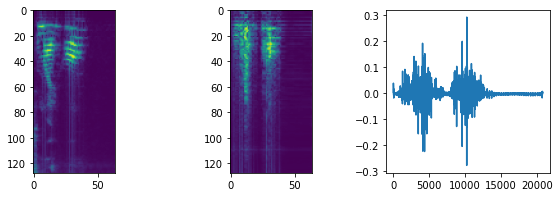

In [7]:
for i in range(len(melout)):
    fig,ax = plt.subplots(1,3,figsize=(10,3))
    ax[0].imshow(melans[i])
    ax[1].imshow(melout[i])
    ax[2].plot(waveout[i].reshape(-1))

In [12]:
import sounddevice as sd
sd.play(waveout[2].reshape(-1),config.frame_rate)